In [1]:
%matplotlib inline



Récupérez le dataset iris  (voir le notebook introapprentissage.ipynb)
 

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris() #Loading the dataset




Quels sont des clés de ce dataset?

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Affichez la clé 'DESCR' pour avoir des informations sur ce dataset

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Quelle est  la taille de la matrice de données (data)

In [16]:
iris.data.shape

(150, 4)

Quels  sont des attributs (features)

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Quelles sont des étiquettes?

In [22]:
unique_labels = set(iris.target)
print("Étiquettes uniques:", unique_labels)

Étiquettes uniques: {0, 1, 2}


Comment les étiquettes sont représentées?

In [21]:
print("Noms des classes:", iris.target_names)

Noms des classes: ['setosa' 'versicolor' 'virginica']


Partitionez le dataset pour avoir X_train, y_train X_test, y_test

%80 pour l'ensemble d'apprentissage, %20 pour l'ensemble de test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Quelles sont les nombres de données dans l'ensemble d'apprentissage et celles qui sont dans l'ensemble de test?


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=10
)
print("Nombre de données dans l'ensemble d'apprentissage:", len(X_train))
print("Nombre de données dans l'ensemble de test:", len(X_test))

Nombre de données dans l'ensemble d'apprentissage: 120
Nombre de données dans l'ensemble de test: 30



Importez  la méthode du k plus proche voisins



In [35]:
from sklearn.neighbors import KNeighborsClassifier

Construisez  le modèle pour le nombre de voisin=1 et pour l'ensemble d'apprentissage



In [43]:
# Création du modèle k-NN avec k=1
knn_model = KNeighborsClassifier(n_neighbors=1)
# Entraînement du modèle sur l'ensemble d'apprentissage
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Prevoyez l'étiquette  pour la donnée avec 
'sepal length (cm)' = 5
'sepal width (cm)' = 2.9
'petal length (cm)' = 1
'petal width (cm)' = 0.2

Attention la donnée doit être une matrice avec 1 ligne et 4 colonnes

In [44]:
# Nouvelle donnée à prédire
new_data = np.array([[5.0, 2.9, 1.0, 0.2]])

# Prédiction avec le modèle k-NN
prediction = knn_model.predict(new_data)

# Affichage de la prédiction
print("Prédiction pour la nouvelle donnée :", prediction)

Prédiction pour la nouvelle donnée : [0]


Affichez le score (la probabilité d'estimer la bonne étiquette) pour l'ensemble de test

In [46]:
# Probabilités d'appartenance à chaque classe pour l'ensemble de test
y_test_probabilities = knn_model.predict_proba(X_test)

# Affichage des probabilités pour les premières observations de l'ensemble de test
print("Probabilités d'appartenance à chaque classe pour les premières observations de l'ensemble de test:")
print(y_test_probabilities[:5])


Probabilités d'appartenance à chaque classe pour les premières observations de l'ensemble de test:
[[0. 1. 0.]]


Vous ne changez pas les ensembles d'apprentissage et de test.

Vous changez la méthode k=2, k=3, k=4, k+5

Vous faites la prédiction pour xnew  avec ces méthodes 

Calculer les scores pour ces méthodes pour ces modèles et dessiner la courbe

Que observez-vous?



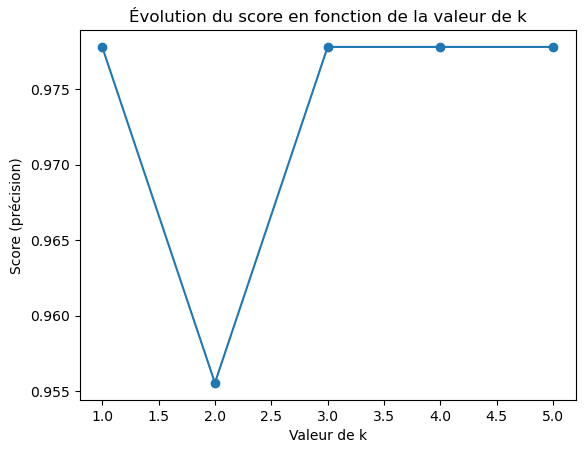

In [55]:

# Stockage des scores
scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    # Création du modèle k-NN avec k spécifié
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Entraînement du modèle sur l'ensemble d'apprentissage
    knn_model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_test_pred = knn_model.predict(X_test)
    
    # Calcul du score (précision)
    score = accuracy_score(y_test, y_test_pred)
    
    # Stockage du score
    scores.append(score)

# Tracé de la courbe des scores en fonction de k
plt.plot(k_values, scores, marker='o')
plt.title('Évolution du score en fonction de la valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Score (précision)')
plt.show()
